In [1]:
# using python 3.9.7
# analysis script for looking for single or multi photon events in the photon detectors.

In [1]:
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
from darkrate_fxns_sam import *
from scipy import interpolate

In [2]:
# acquire all file names in directory
filespath = '/Users/samuelfogarty/OneDrive/Desktop/OneDrive/photondetectortests/data/singlephotonsearch/'
#abovebreakdown = '12usecwindow__25MHzSR_1kpts_10mVperdiv_ch4_44.135Bias'
#belowbreakdown = '12usecwindow_25MHzSR_1kpts_10mVperdiv_ch4_10.932VBias'
abovebreakdown = '10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias'
belowbreakdown = '10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias'


# file path of each directory
filespath_bbd = filespath + belowbreakdown
filespath_abd = filespath + abovebreakdown
# list of file names in each directory
filenames_bbd = os.listdir(filespath_bbd)
filenames_abd = os.listdir(filespath_abd)
print(filenames_bbd)
#filenames_bbd = filenames_bbd[0:4]
#filenames_abd = filenames_abd[0:4]
#filenames_abd = ['wvfm_25MHzSR_44.329VBias_10msPerDiv_2.5Mpts_module4_000_ALL.csv']

['trace_ch4_20220607150151022.csv', 'trace_ch4_20220607150251882.csv', 'trace_ch4_20220607150121148.csv', 'trace_ch4_20220607150453502.csv', 'trace_ch4_20220607150423632.csv', 'trace_ch4_20220607150221105.csv', 'trace_ch4_20220607150051062.csv', 'trace_ch4_20220607150352676.csv', 'trace_ch4_20220607150524078.csv', 'trace_ch4_20220607150321808.csv']


In [3]:
# loop through each file, above and below breakdown
ncandidates_abd,ncandidates_bbd = 0,0
total_candidate_integrals_abd,total_candidate_integrals_bbd = np.array([]),np.array([])
window_start_indices_abd,window_end_indices_abd = np.array([]), np.array([])
window_start_indices_bbd,window_end_indices_bbd = np.array([]),np.array([])
points = 100000 # to average for voltage baseline

for filename_abd in filenames_abd:
    filepath_abd = filespath_abd + '/' + filename_abd
    t, V = getData(filepath_abd)
    nonInfOrNaN = np.isfinite(V)
    isInfOrNaN = np.invert(nonInfOrNaN)
    V_finite = V[nonInfOrNaN]
    t_finite = t[nonInfOrNaN]
    f = interpolate.interp1d(t_finite, V_finite,kind='cubic')
    f_voltages = f(t)
    V = f_voltages
    #V_inf = np.isinf(V)
    #V[V_inf] = 0.0000001
    #V_baseline = np.mean(V, where = np.isfinite(V))
    V_baseline = np.mean(V)
    print(V_baseline)
    #voltage_baseline = np.sum(V[0:points])/points
    #V -= V_baseline
    darkcount, photon_candidates,window_start_indices, window_end_indices = findcandidates(t,V)
    total_candidate_integrals_abd = np.concatenate((total_candidate_integrals_abd,photon_candidates))
    window_start_indices_abd = np.concatenate((window_start_indices_abd, window_start_indices))
    window_end_indices_abd = np.concatenate((window_end_indices_abd, window_end_indices))
    ncandidates_abd += darkcount
    #print(len(total_candidate_integrals_abd))
for filename_bbd in filenames_bbd:
    filepath_bbd = filespath_bbd + '/' + filename_bbd
    t, V = getData(filepath_bbd)
    nonInfOrNaN = np.isfinite(V)
    isInfOrNaN = np.invert(nonInfOrNaN)
    V_finite = V[nonInfOrNaN]
    t_finite = t[nonInfOrNaN]
    f = interpolate.interp1d(t_finite, V_finite,kind='cubic')
    f_voltages = f(t)
    V = f_voltages
    #V_inf = np.isinf(V)
    #V[V_inf] = 0.0000001
    #voltage_baseline = np.sum(V[0:points])/points
    #V_baseline = np.mean(V, where = np.isfinite(V))
    V_baseline = np.mean(V)
    V -= V_baseline
    darkcount, photon_candidates,window_start_indices, window_end_indices = findcandidates(t,V)
    total_candidate_integrals_bbd = np.concatenate((total_candidate_integrals_bbd,photon_candidates))
    window_start_indices_bbd = np.concatenate((window_start_indices_bbd, window_start_indices))
    window_end_indices_bbd = np.concatenate((window_end_indices_bbd, window_end_indices))
    ncandidates_bbd += darkcount

#total_candidate_integrals_abd = np.array(total_candidate_integrals_abd)
#total_candidate_integrals_bbd = np.array(total_candidate_integrals_bbd)

-0.00014114612453195027
-9.280509608428752e-05
-9.871947691917828e-05
-9.296865937465182e-05
-6.871172384535692e-05
-8.538505050376095e-05
-7.540945808870503e-05
-8.480465329167681e-05
-0.00011553800453926709
-0.00010130666869128181


In [5]:
#print("The number of infinities abd = ",np.sum(np.isinf(total_candidate_integrals_abd)))
#print("The number of infinities bbd = ",np.sum(np.isinf(total_candidate_integrals_bbd)))
#selectinfinities_abd = np.isinf(total_candidate_integrals_abd)
#selectinfinities_bbd = np.isinf(total_candidate_integrals_bbd)
#total_candidate_integrals_abd_noninfinity = total_candidate_integrals_abd[np.invert(selectinfinities_abd)]
#total_candidate_integrals_bbd_noninfinity = total_candidate_integrals_bbd[np.invert(selectinfinities_bbd)]

In [4]:
total_candidate_integrals_abd_noninfinity = total_candidate_integrals_abd
total_candidate_integrals_bbd_noninfinity = total_candidate_integrals_bbd

36738
30384


No handles with labels found to put in legend.
/var/folders/dc/52hbwd7j7hz065sqpvxpqy280000gn/T/ipykernel_70548/126407374.py:26: RuntimeWarning: divide by zero encountered in true_divide
  counts_diff = (counts_abd/np.max(counts_abd) * adjust_abd)/(counts_bbd/np.max(counts_bbd) * adjust_bbd)
/var/folders/dc/52hbwd7j7hz065sqpvxpqy280000gn/T/ipykernel_70548/126407374.py:26: RuntimeWarning: invalid value encountered in true_divide
  counts_diff = (counts_abd/np.max(counts_abd) * adjust_abd)/(counts_bbd/np.max(counts_bbd) * adjust_bbd)


Text(0.5, 1.0, 'normalized-histogram ratio')

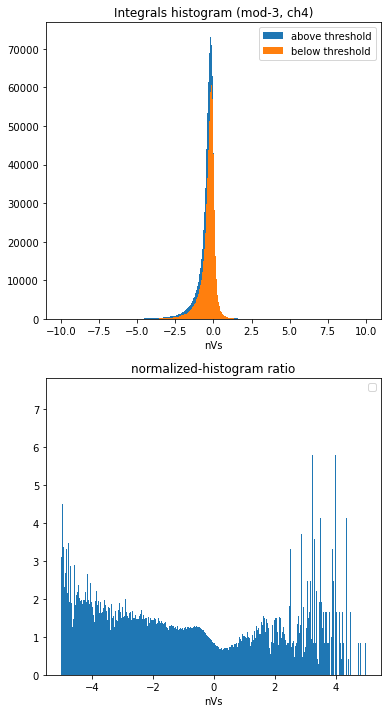

In [7]:
# histogram the integrals
adjust_abd = 1.0
adjust_bbd = 1.0
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(6,12))
binnum = 1000
rangemax = 5e-9
binwidth = 2*rangemax/binnum
counts_abd, bins_abd = np.histogram(total_candidate_integrals_abd_noninfinity,range=(-1*rangemax,rangemax), bins=binnum)
counts_bbd, bins_bbd = np.histogram(total_candidate_integrals_bbd_noninfinity,range=(-1*rangemax,rangemax), bins=binnum)
#axes[0].hist(bins_abd[:-1]*1e9, bins_abd*1e9, weights=counts_abd/np.max(counts_abd),label='above threshold')
#axes[1].hist(bins_bbd[:-1]*1e9, bins_bbd*1e9, weights=counts_bbd/np.max(counts_bbd),label='below threshold')
print(np.max(counts_abd))
print(np.max(counts_bbd))
#axes[0].bar(bins_abd[:-1]*1e9, counts_abd/np.max(counts_abd) * adjust_abd, width = binwidth*1e9, align = 'center',label='at breakdown',zorder=1,alpha=0.4)
#axes[0].bar(bins_bbd[:-1]*1e9, counts_bbd/np.max(counts_bbd) *adjust_bbd, width = binwidth*1e9, align = 'center',label='below breakdown',zorder=0,alpha=0.4)
axes[0].set_title('Integrals histogram (mod-3, ch4)')
axes[0].hist(total_candidate_integrals_abd_noninfinity*1e9,range=(-10,10), bins=1000,label='above threshold')
axes[0].hist(total_candidate_integrals_bbd_noninfinity*1e9,range=(-10,10) ,bins=1000,label='below threshold')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel('nVs')
axes[1].set_xlabel('nVs')
#axes[0].set_xlim(-2.5,2.5)
#axes[1].set_xlim(-2.5,2.5)

counts_diff = (counts_abd/np.max(counts_abd) * adjust_abd)/(counts_bbd/np.max(counts_bbd) * adjust_bbd)
axes[1].bar(bins_abd[:-1]*1e9, counts_diff, width = binwidth*1e9, align = 'center')
axes[1].set_title('normalized-histogram ratio')
#plt.savefig('mod4_ch4_integrals_rolling.pdf')
#axes[0].set_xlabel('nVs')
#plt.title('Integrals, above threshold')
#plt.xlabel('nVs')
#plt.legend()
#plt.show()

In [25]:
np.sum(np.isinf(total_candidate_integrals_abd))/ncandidates_abd * 100

49.656265650156655

In [29]:
bins_abd[1:][counts_abd/np.max(counts_abd) == 1] * 1e9

array([-0.025])

No handles with labels found to put in legend.


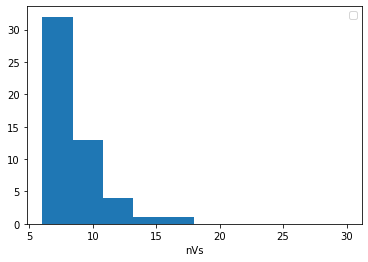

In [14]:
## a more hard coded way of normalizing
counts_abd, bins_abd = np.histogram(total_candidate_integrals_abd_noninfinity, bins=10,range=(6e-9,30.0e-9))
counts_bbd, bins_bbd = np.histogram(total_candidate_integrals_bbd_noninfinity, bins=10,range=(6e-9,30.0e-9))
plt.hist(bins_abd[:-1]*1e9, bins_abd*1e9, weights=counts_abd)
#plt.hist(bins_bbd[:-1]*1e9, bins_bbd*1e9, weights=counts_bbd)
#plt.title('Integrals normalized')
plt.xlabel('nVs')
plt.legend()
plt.show()

In [37]:
# histogram the integrals

#plt.hist(total_candidate_integrals_abd_noninfinity*1e9, density=True,bins=100,label='above threshold')
#plt.hist(total_candidate_integrals_bbd_noninfinity*1e9, density=True,bins=100,label='below threshold')
#plt.title('Integrals normalized')
#plt.xlabel('nVs')
#plt.legend()
#plt.show()

In [12]:
print("number of photon candidates below breakdown = ",ncandidates_bbd)
print("number of photon candidates above breakdown = ",ncandidates_abd)
print("The number of infinities abd = ",np.sum(np.isinf(total_candidate_integrals_abd)))
print("The number of infinities bbd = ",np.sum(np.isinf(total_candidate_integrals_bbd)))
print("Percentage of infinities at breakdown = ", np.sum(np.isinf(total_candidate_integrals_abd))/ncandidates_abd * 100)
print("Percentage of infinities below breakdown = ", np.sum(np.isinf(total_candidate_integrals_bbd))/ncandidates_bbd * 100)

number of photon candidates below breakdown =  335436
number of photon candidates above breakdown =  337606
The number of infinities abd =  6759
The number of infinities bbd =  1039
Percentage of infinities at breakdown =  2.002037878473724
Percentage of infinities below breakdown =  0.3097461214657938


In [7]:
DCR = (ncandidates_abd - ncandidates_bbd)/0.1
print('Dark count rate estimate = ', DCR)

Dark count rate estimate =  105120.0


In [39]:
# look at candidates visually
filepath_abd = filespath_abd + '/' + filenames_abd[0]
t, V = getData(filepath_abd)
windows_start_indices_abd, windows_end_indices_abd = findwindows(t,V)
#candidates = findcandidates(t,V)

In [40]:
# clear evidence that there are duplicates
#print(windows_start_indices_abd[0:25])
#print(windows_end_indices_abd[0:25])

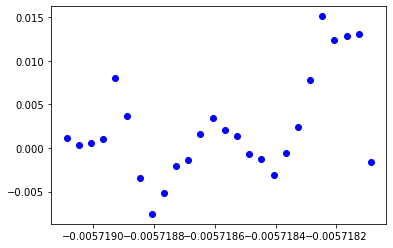

In [15]:
sel = 1
firstindex = windows_start_indices_abd[sel]
lastindex = windows_end_indices_abd[sel]
plt.plot(t[firstindex:lastindex], V[firstindex:lastindex], 'bo')


In [13]:
window_start_indices_abd = np.int32(window_start_indices_abd)
window_end_indices_abd = np.int32(window_end_indices_abd)
window_start_indices_bbd = np.int32(window_start_indices_bbd)
window_end_indices_bbd = np.int32(window_end_indices_bbd)

In [18]:
window_start_indices_abd_infinities = window_start_indices_abd[selectinfinities_abd]
window_end_indices_abd_infinities = window_end_indices_abd[selectinfinities_abd]

In [20]:
start_index = window_start_indices_abd_infinities[0]
end_index = window_end_indices_abd_infinities[0]


array([ 26934,  59781,  66683, ..., 432627, 376718, 376742], dtype=int32)